In [ ]:
#Import packages
import pickle
import re
import string
import unicodedata
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**LOAD DATASET**

In [ ]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**DATASET INFORMATION**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Missing Value**

In [ ]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values
features_with_na

[]

**SPLIT DATASET**

In [ ]:
x = df.iloc[:,0 :13].values
print(x)
print(x.shape)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]
(303, 13)


In [ ]:
y = df.iloc[:, 13].values
print(y)
print(y.shape)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]
(303,)


**TRAIN-TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(242, 13) (61, 13)
(242,) (61,)


**Naive Bayes Algorithm**

Train Accuracy ::  0.7520661157024794
Test Accuracy  ::  0.7213114754098361
[[19  5]
 [12 25]]
              precision    recall  f1-score   support

           0       0.61      0.79      0.69        24
           1       0.83      0.68      0.75        37

    accuracy                           0.72        61
   macro avg       0.72      0.73      0.72        61
weighted avg       0.75      0.72      0.72        61



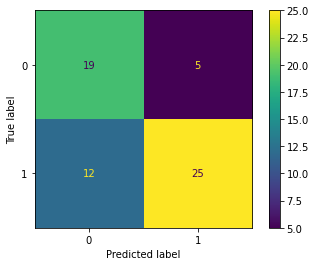

In [ ]:
#Naive Bayes Algorithm
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
model = MultinomialNB().fit(x_train, y_train)
# Predict Output
NBpred = model.predict(x_test)
print("Train Accuracy :: ", accuracy_score(y_train,model.predict(x_train)))
print("Test Accuracy  :: ", accuracy_score(y_test, NBpred))
cm1=confusion_matrix(y_test, NBpred)
print(confusion_matrix(y_test, NBpred))
print(classification_report(y_test, NBpred))
#SVC(random_state=0)
plot_confusion_matrix(model, x_test, y_test)  # doctest: +SKIP
plt.show()


**K-FOLD**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import naive_bayes
clf = naive_bayes.MultinomialNB()
scores = cross_val_score(clf, x, y, cv=5) #CV means K
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.75409836 0.73770492 0.7704918  0.78333333 0.7       ]
Accuracy: 0.75 (+/- 0.06)


**Decision Tree Algorithm**

Train Accuracy ::  1.0
Test Accuracy  ::  0.7704918032786885
[[16  8]
 [ 6 31]]
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        24
           1       0.79      0.84      0.82        37

    accuracy                           0.77        61
   macro avg       0.76      0.75      0.76        61
weighted avg       0.77      0.77      0.77        61



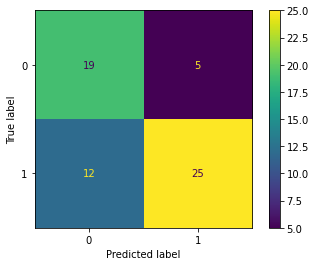

In [ ]:
#Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Train Accuracy :: ", accuracy_score(y_train,classifier.predict(x_train)))
print("Test Accuracy  :: ", accuracy_score(y_test, y_pred))
cm1=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, x_test, y_test)  # doctest: +SKIP
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, x, y, cv=5) #CV means K
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.7704918  0.85245902 0.72131148 0.7        0.73333333]
Accuracy: 0.76 (+/- 0.11)


**SVM Algorithm**

Train Accuracy ::  0.8553719008264463
Test Accuracy  ::  0.8524590163934426
[[19  5]
 [ 4 33]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        24
           1       0.87      0.89      0.88        37

    accuracy                           0.85        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.85      0.85        61



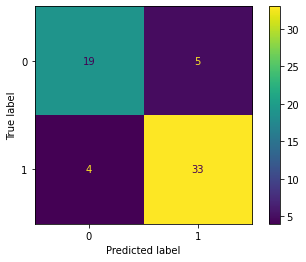

In [ ]:
#SVM Algorithm
from sklearn.svm import SVC,SVR
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)
SVM_pred = svclassifier.predict(x_test)
print("Train Accuracy :: ", accuracy_score(y_train,svclassifier.predict(x_train)))
print("Test Accuracy  :: ", accuracy_score(y_test, SVM_pred))
cm1=confusion_matrix(y_test, SVM_pred)
print(confusion_matrix(y_test, SVM_pred))
print(classification_report(y_test, SVM_pred))
SVC(random_state=0)
plot_confusion_matrix(svclassifier, x_test, y_test)  # doctest: +SKIP
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, x, y, cv=5) #CV means K
print(scores)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
Accuracy: 0.83 (+/- 0.09)


**Random Forest Algorithm**

Trained model ::  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=500, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=47, verbose=0,
                       warm_start=False)
Train Accuracy ::  0.9958677685950413
Test Accuracy  ::  0.7704918032786885
[[18  6]
 [ 8 29]]
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        24
           1       0.83      0.78      0.81        37

    accuracy                           0.77        61
   macro avg       0.76      0.77      0.76        61
weighted avg       0.77      0.77      0.77        61



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


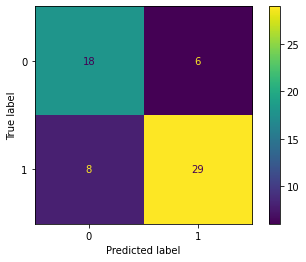

In [ ]:
#Random Forest Algorithm
from sklearn.ensemble.forest import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20, max_depth=500,random_state=47)
model=clf.fit(x_train, y_train)
print("Trained model :: ",model)
predictions =model.predict(x_test)
print("Train Accuracy :: ", accuracy_score(y_train,model.predict(x_train)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))
cm1=confusion_matrix(y_test, predictions)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
plot_confusion_matrix(clf, x_test, y_test)  # doctest: +SKIP
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
clf =ensemble.forest.RandomForestClassifier()
scores = cross_val_score(clf, x, y, cv=5) #CV means K
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.83606557 0.8852459  0.80327869 0.81666667 0.78333333]
Accuracy: 0.82 (+/- 0.07)


**Ada-Boost Algorithm**

Trained model ::  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)
Train Accuracy ::  0.9669421487603306
Test Accuracy  ::  0.7540983606557377
[[18  6]
 [ 9 28]]
              precision    recall  f1-score   support

           0       0.67      0.75      0.71        24
           1       0.82      0.76      0.79        37

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.76      0.75      0.76        61



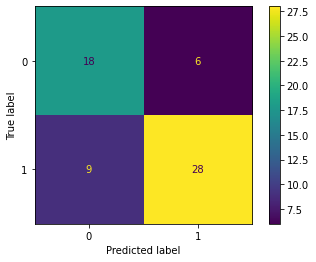

In [ ]:
#Ada-Boost Algorithm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
Model=clf.fit(x_train,y_train)
print("Trained model :: ",Model)
Ada_pred =Model.predict(x_test)
print("Train Accuracy :: ", accuracy_score(y_train,Model.predict(x_train)))
print("Test Accuracy  :: ", accuracy_score(y_test, Ada_pred))
cm1=confusion_matrix(y_test, Ada_pred)
print(confusion_matrix(y_test, Ada_pred))
print(classification_report(y_test, Ada_pred))
plot_confusion_matrix(clf, x_test, y_test)  # doctest: +SKIP
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
clf =  ensemble.AdaBoostClassifier()
scores = cross_val_score(clf, x, y, cv=5) #CV means K
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.85245902 0.81967213 0.78688525 0.73333333 0.73333333]
Accuracy: 0.79 (+/- 0.09)


**KNN Algorithm**

Trained model ::  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
Train Accuracy ::  0.7768595041322314
Test Accuracy  ::  0.6557377049180327
[[18  6]
 [15 22]]
              precision    recall  f1-score   support

           0       0.55      0.75      0.63        24
           1       0.79      0.59      0.68        37

    accuracy                           0.66        61
   macro avg       0.67      0.67      0.65        61
weighted avg       0.69      0.66      0.66        61



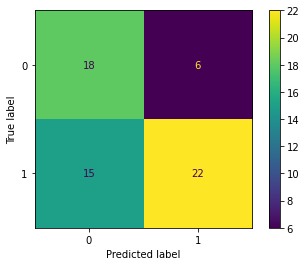

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
clf = KNeighborsClassifier(n_neighbors=3)
Model=clf.fit(x_train,y_train)
print("Trained model :: ",Model)
Knn_pred =Model.predict(x_test)
print("Train Accuracy :: ", accuracy_score(y_train,Model.predict(x_train)))
print("Test Accuracy  :: ", accuracy_score(y_test, Knn_pred))
cm1=confusion_matrix(y_test, Knn_pred)
print(confusion_matrix(y_test, Knn_pred))
print(classification_report(y_test, Knn_pred))
plot_confusion_matrix(clf, x_test, y_test)  # doctest: +SKIP
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
clf =  neighbors.KNeighborsClassifier()
scores = cross_val_score(clf, x, y, cv=5) #CV means K
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Accuracy: 0.64 (+/- 0.11)
